In [304]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    classification_report,
    roc_auc_score,
    roc_curve,
)
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

#ignore warnings




#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [305]:
# Load the dataset
data = pd.read_csv('/content/Bankruptcy.csv')
data

,FYEAR,Bankruptcy Status,CUSTOMERID,Ratio1,Ratio2,Ratio3,Ratio3.1,Ratio4,Ratio5,Ratio6,Ratio7,Ratio8,Ratio9
0,1999,0,36020,0.307139,0.887006,1.647681,-0.199158,1.092964,-0.313289,-0.196793,1.206763,0.282471,0.158896
1,1999,0,36110,0.760736,0.592493,0.453003,-0.369890,0.186154,0.039619,0.327497,0.428418,1.106965,0.793443
2,1999,0,37520,-0.513596,0.337615,0.299015,-0.029080,-0.432605,0.829993,-0.707786,0.476153,2.179175,2.484584
3,1994,1,78110,-0.466129,0.370747,0.496067,-0.373429,-0.267424,0.977799,-0.610975,0.456810,0.151951,0.047789
4,1999,0,00079X10,2.023422,0.214876,0.182595,6.695360,-1.148338,-1.505889,2.876477,0.287375,-0.986442,0.791077
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2670,1999,0,49285410,0.191128,0.976163,0.608346,-0.278648,0.775383,-0.516430,-0.260754,0.713168,0.069354,-0.280715
2671,1999,0,49291410,-0.580954,0.102915,-0.201120,-0.407839,-0.898906,0.675926,-0.354823,-0.191266,0.812556,0.689247
2672,1984,1,49308610,0.235830,-0.859216,-2.064232,-0.254868,-1.132475,-0.949022,-0.003124,-2.208175,-1.659251,-1.410121
2673,1999,0,49314310,0.916017,1.039148,0.527343,-0.238556,0.355071,-0.810784,0.306500,0.639685,0.031738,-0.259418


In [306]:
summary = data.describe()
summary

,FYEAR,Bankruptcy Status,Ratio1,Ratio2,Ratio3,Ratio3.1,Ratio4,Ratio5,Ratio6,Ratio7,Ratio8,Ratio9
count,2675.000000,2675.000000,2675.000000,2675.000000,2675.000000,2675.000000,2675.000000,2675.000000,2675.000000,2675.000000,2675.000000,2675.000000
mean,1997.394393,0.154393,-0.260608,-0.297103,-0.254794,0.187452,-0.119215,0.221076,-0.126803,-0.235431,0.021316,0.155587
std,4.177929,0.361392,1.192141,1.124522,1.096225,1.403260,1.042906,1.289719,1.023760,1.141943,1.099816,1.135394
min,1980.000000,0.000000,-4.382768,-2.241779,-2.064232,-0.427118,-1.363863,-1.505889,-1.233403,-2.208175,-2.763557,-2.213995
25%,1999.000000,0.000000,-0.749888,-1.099912,-1.067537,-0.389813,-0.875378,-0.615204,-0.779511,-0.987149,-0.656834,-0.660825
50%,1999.000000,0.000000,-0.229314,0.121304,0.053529,-0.307199,-0.344616,0.042644,-0.446842,0.205252,0.058613,0.076462
75%,1999.000000,0.000000,0.460661,0.506159,0.490700,-0.013631,0.339016,0.626030,0.119915,0.519490,0.803069,0.963078
max,1999.000000,1.000000,2.023422,1.485390,2.142463,6.695360,4.036249,5.110424,2.876477,2.000565,2.179175,2.484584


In [307]:
data=data.drop('FYEAR',axis=1)

In [308]:
data=data.drop('CUSTOMERID',axis=1)

**Data Preprocessing**

**1) Missing Values**

In [309]:
data.isnull().sum()

Bankruptcy Status    0
Ratio1               0
Ratio2               0
Ratio3               0
Ratio3.1             0
Ratio4               0
Ratio5               0
Ratio6               0
Ratio7               0
Ratio8               0
Ratio9               0
dtype: int64

No Missing values found in our dataset.

**2) Duplicates**

In [310]:
data=data.drop_duplicates()

All duplicates dropped from the dataset(if any)

**3) Target Variable**

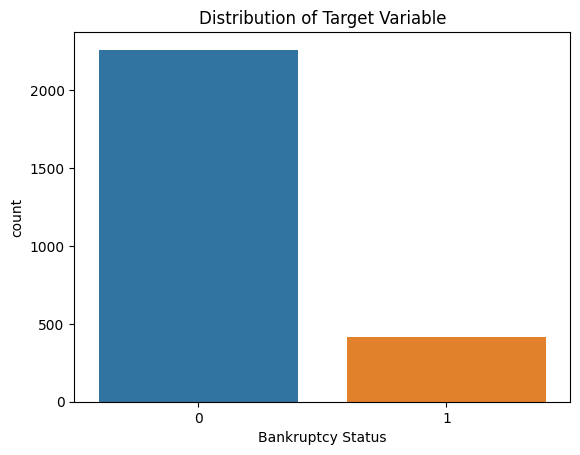

In [311]:
# Visualize the distribution of the target variable (assuming binary classification)
sns.countplot(x='Bankruptcy Status', data=data)
plt.title("Distribution of Target Variable")
plt.show()

In [312]:
data['Bankruptcy Status'].value_counts()

0    2262
1     413
Name: Bankruptcy Status, dtype: int64

Data is highly imbalanced. We will use SMOTE technique to balance the data.

**4) Outliers**

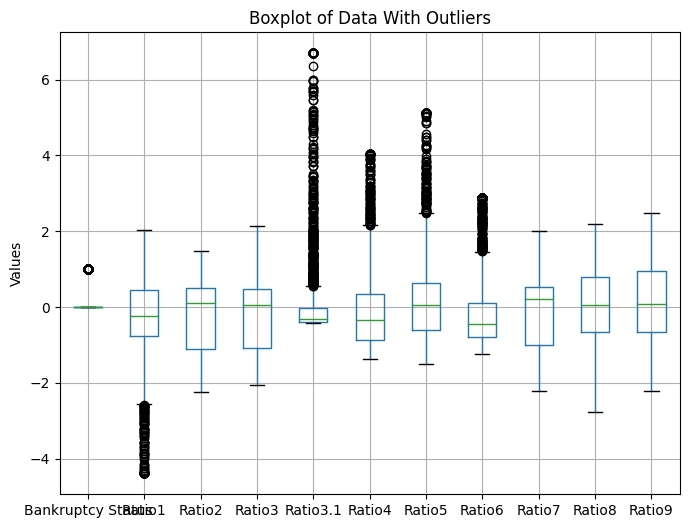

In [313]:
# Create a boxplot of the DataFrame with outliers
plt.figure(figsize=(8, 6))
data.boxplot()
plt.title("Boxplot of Data With Outliers")
plt.ylabel("Values")
plt.show()


Ratio 1, Ratio 3.1, Ratio 4 , Ratio 5 and Ratio 6 have a lot of outliers.
We can not directly remove outliers as data is highly imbalance and it can remove all the rows with data label - (1).

**5) Distribution of Independent Variables**

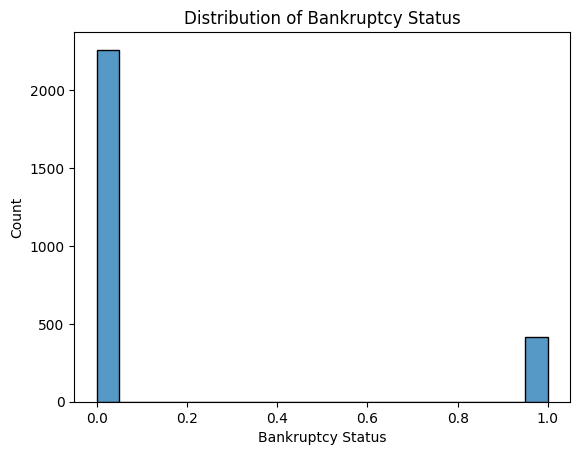

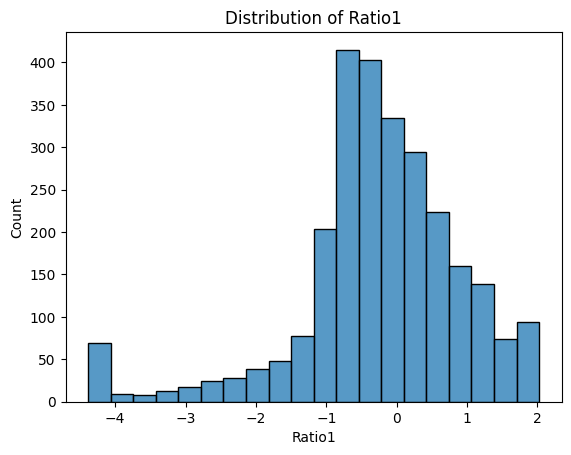

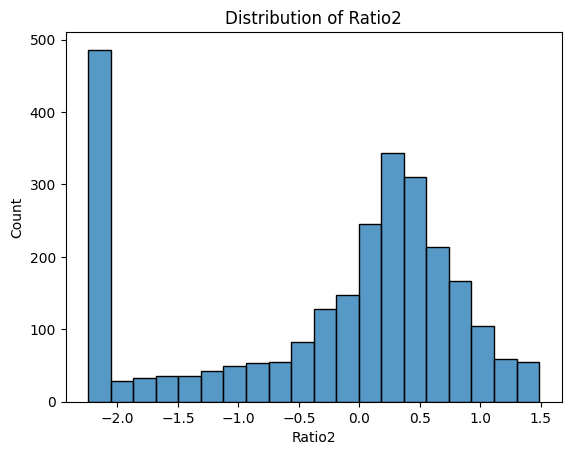

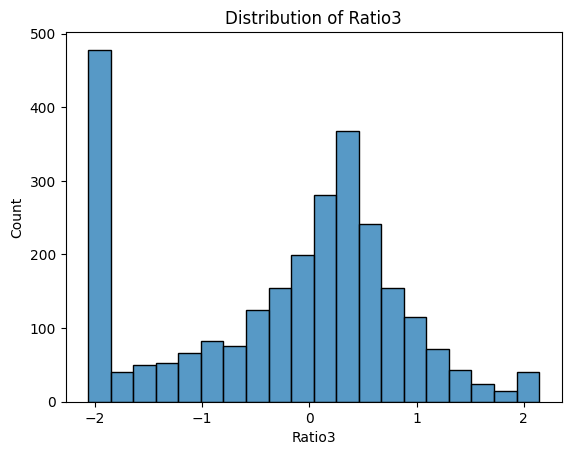

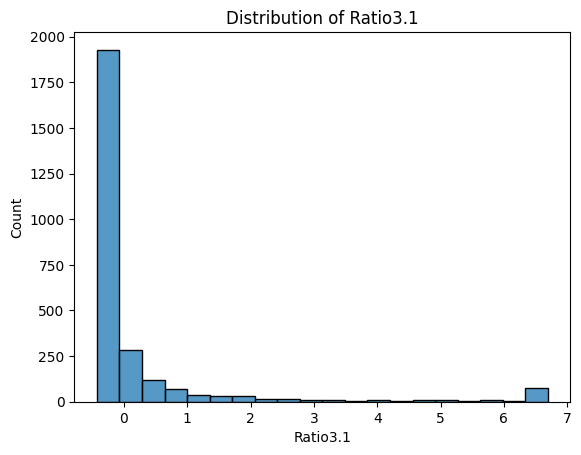

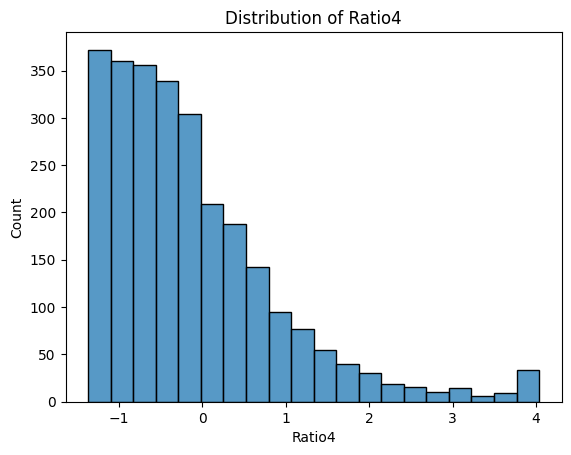

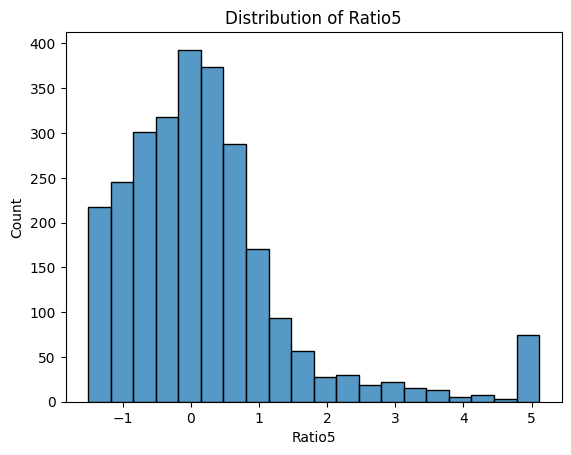

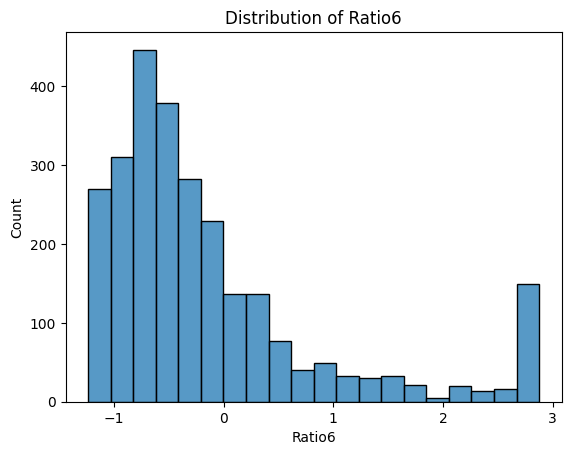

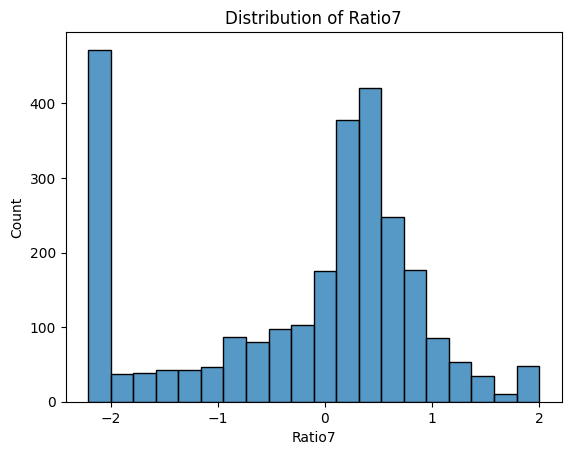

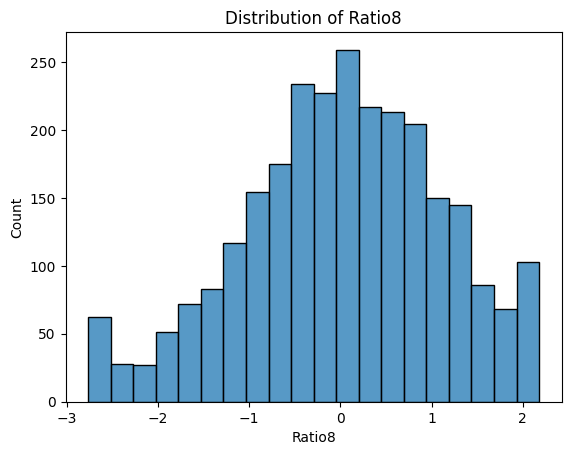

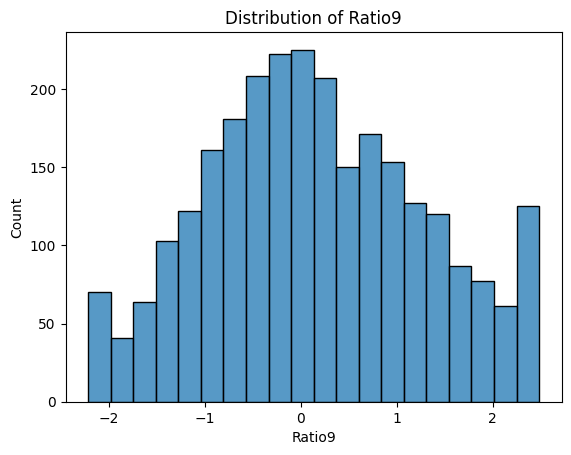

In [314]:
# Explore the distribution of numeric features
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_columns:
    sns.histplot(data[col], bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()

Most of the Ratios are skewed but Ratio 3.1 ,4,5,6 are highly skewed.

**6) Correlation Heatmap**

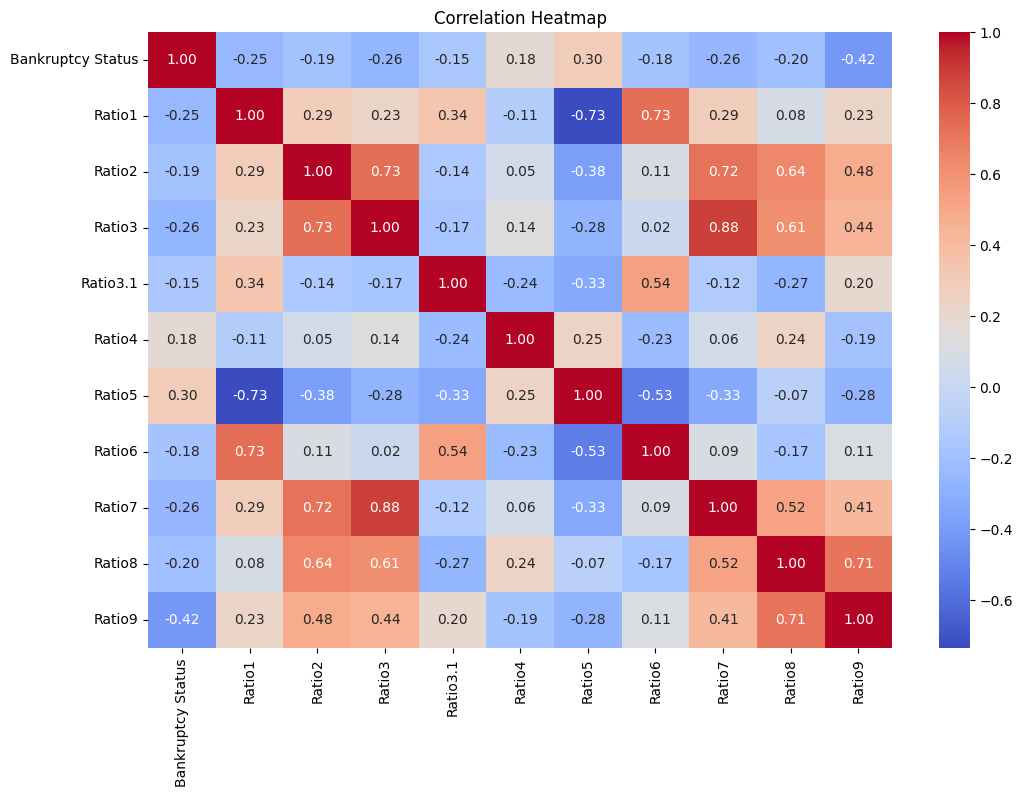

In [315]:
# Filter numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Create the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


1. Ratio 1 (-0.25)
2. Ratio 2 (-0.19)
3. Ratio 3 (-0.26)
4. Ratio 3.1 (-0.15)
5. Ratio 4 (0.18)
6. Ratio 5 (0.30)
7. Ratio 6 (-0.18)
8. Ratio 7 (-0.26)
9. Ratio 8 (-0.20)
10. Ratio 9 (-0.42)

None of the features are highly correlated to the dependent variable. Almost all the features have either low positive correlation or low negative correlation.

Ratio 3.1 has a lot of outliers and has very low negative correlation (-0.15) and same for Ratio 4(0.18) & 6(-0.18). Hence we will remove them.

In [316]:
data = data.drop(columns=['Ratio3.1'])

In [317]:
data = data.drop(columns=['Ratio4'])

In [318]:
data = data.drop(columns=['Ratio6'])

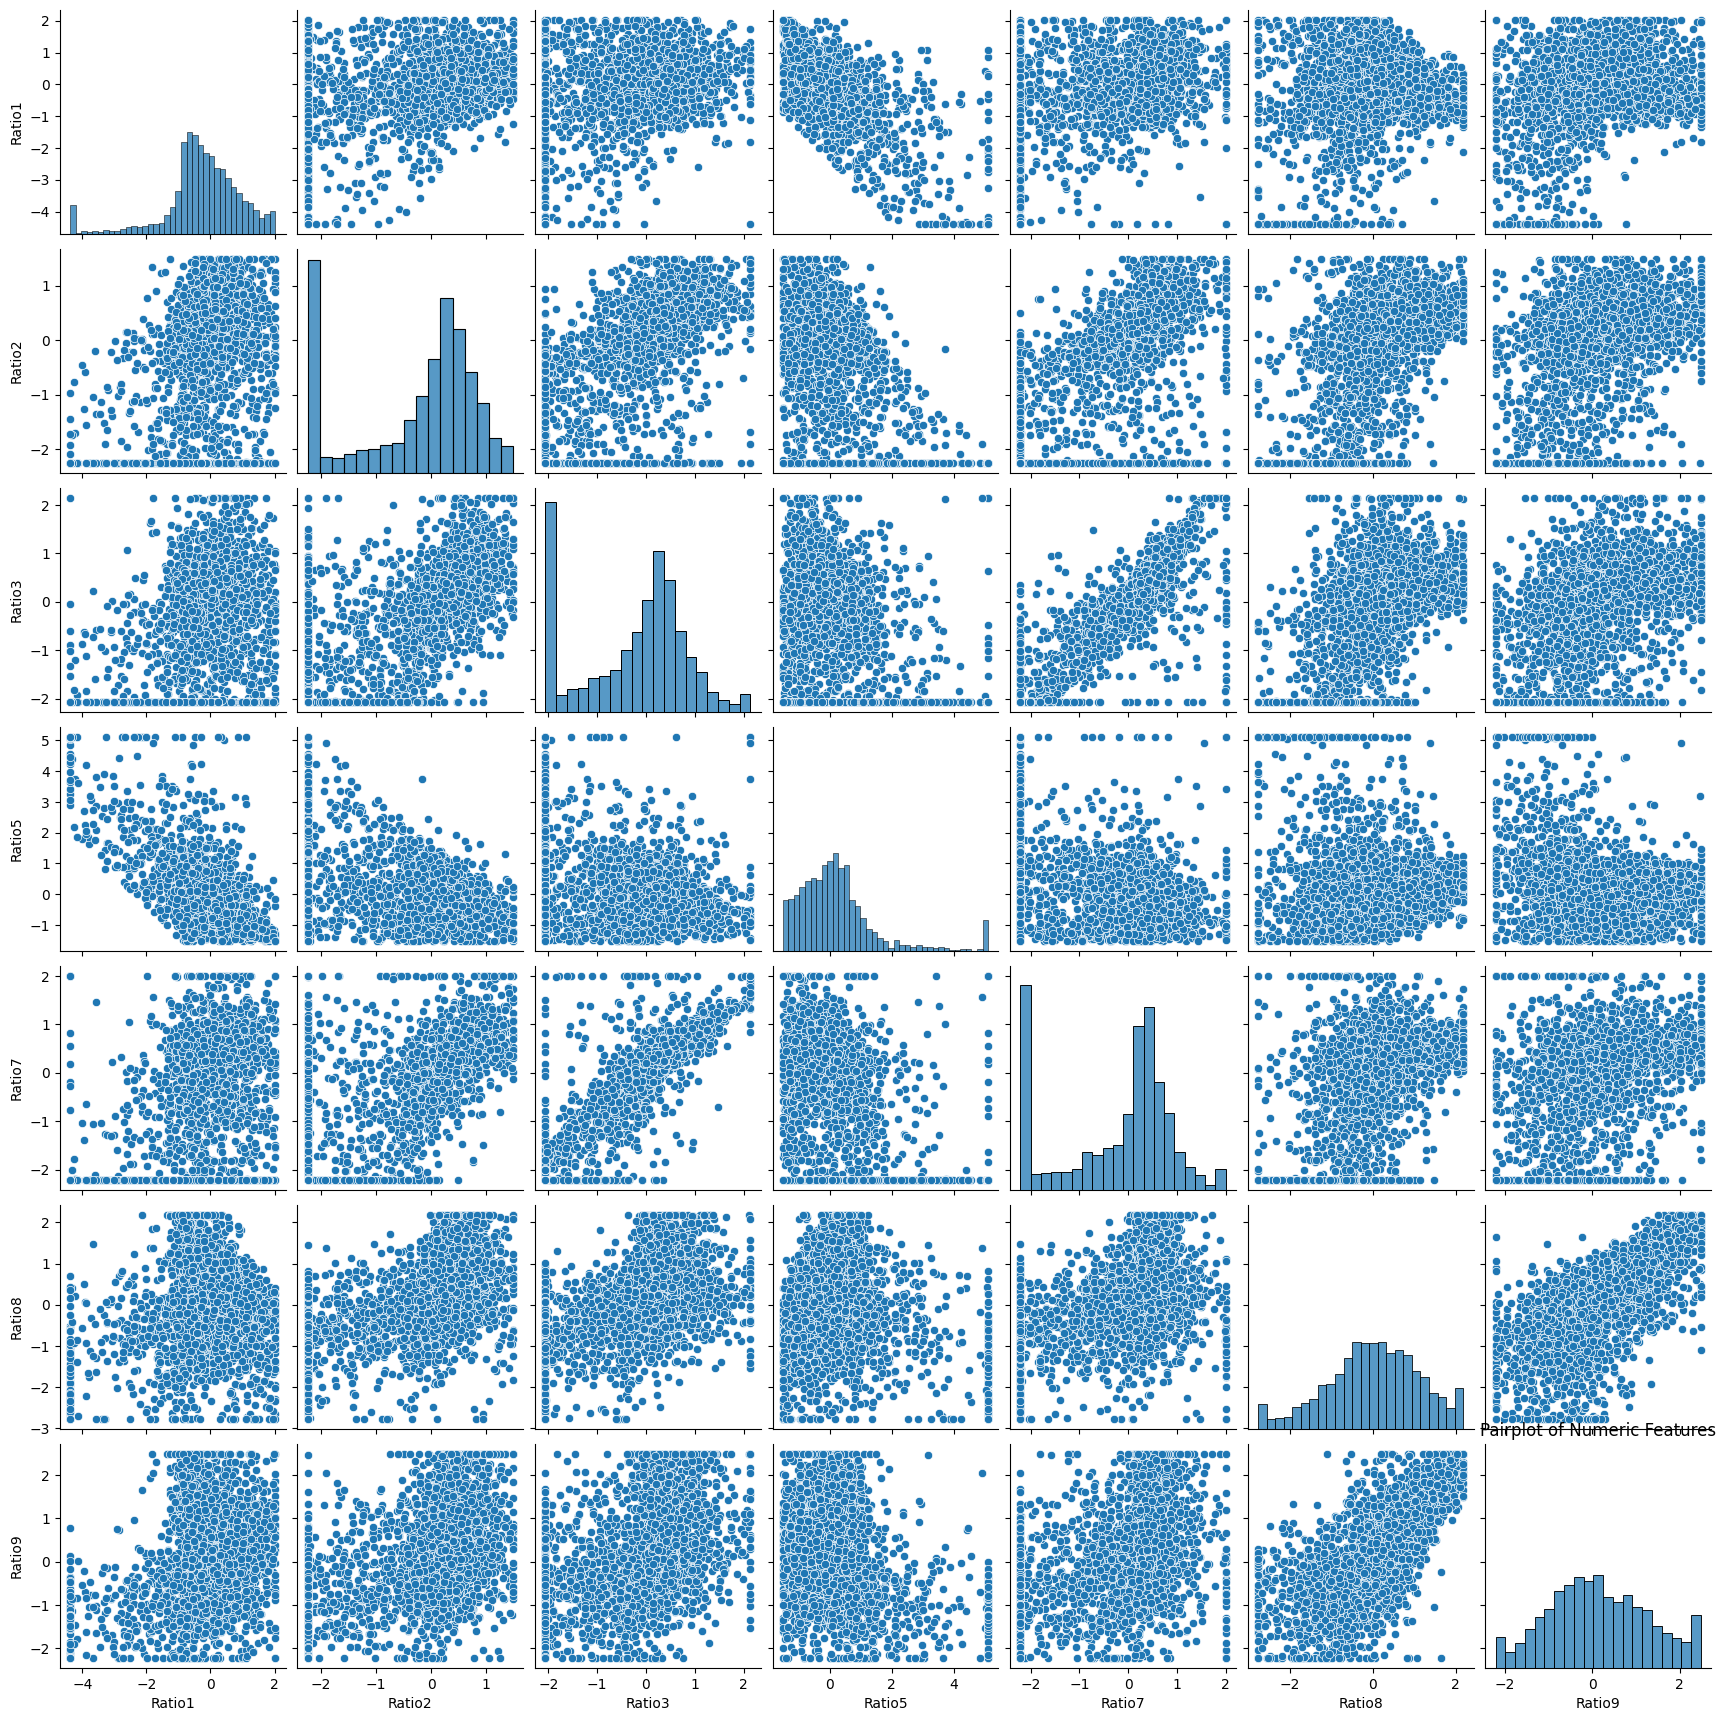

In [319]:
# Pairplot for selected numeric features (adjust 'numeric_features' as needed)
numeric_features = ['Ratio1', 'Ratio2', 'Ratio3', 'Ratio5', 'Ratio7', 'Ratio8', 'Ratio9']
sns.pairplot(data[numeric_features])
plt.title('Pairplot of Numeric Features')
plt.show()

**7) ML Model & Evaluation**

We will be using 3 Classification Models and choose the best model based on it's evaluation.

1) Logistic Regression

2) Adaboost

3) XGBoost

4) Decision Tree

In [320]:
# Define the features (X) and target variable (y)
y = data['Bankruptcy Status']
X = data.drop(columns=['Bankruptcy Status'])


In [321]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [322]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [323]:
sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

**1) Logistic Regression**

In [324]:
# Build and train the logistic regression model
model = LogisticRegression()
model.fit(x_train_res, y_train_res)

LogisticRegression()

In [325]:
# Make predictions
y_pred = model.predict(X_test)

In [326]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

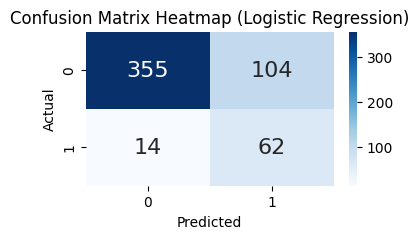

In [327]:
# Confusion Matrix Heatmap

plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap (Logistic Regression)")
plt.show()

In [328]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)

Accuracy: 0.7794392523364486
Confusion Matrix:
 [[355 104]
 [ 14  62]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.77      0.86       459
           1       0.37      0.82      0.51        76

    accuracy                           0.78       535
   macro avg       0.67      0.79      0.68       535
weighted avg       0.88      0.78      0.81       535



1. In this case, the model has an accuracy of approximately 0.7794, which means it correctly classifies about 77.94% of the total instances.

2. **Confusion Matrix**:
   - True Positive (TP): 62
   - True Negative (TN): 355
   - False Positive (FP): 104
   - False Negative (FN): 14

   The confusion matrix provides a detailed breakdown of the model's performance:
   - 355 instances were correctly classified as "0."
   - 62 instances were correctly classified as "1."
   - 104 instances were incorrectly classified as "1" when they were actually "0" (false positives).
   - 14 instances were incorrectly classified as "0" when they were actually "1" (false negatives).

3. **Classification Report**:
   - **Precision** is the proportion of true positive predictions out of all positive predictions. For class "0," it's 0.96, and for class "1," it's 0.37. High precision indicates that the positive predictions are reliable.
   - **Recall** (or Sensitivity) is the proportion of true positive predictions out of all actual positive instances. For class "0," it's 0.77, and for class "1," it's 0.82. High recall indicates that the model is good at capturing positive instances.
   - **F1-Score** is the harmonic mean of precision and recall. For class "0," it's 0.86, and for class "1," it's 0.51. It balances precision and recall.
   - **Support** indicates the number of instances in each class.

In summary, this classification model has an accuracy of approximately 77.94%, with relatively high precision for class "0" and reasonable recall for class "1." The F1-score provides a balanced measure of performance.

AUC Score: 0.8522531819745442


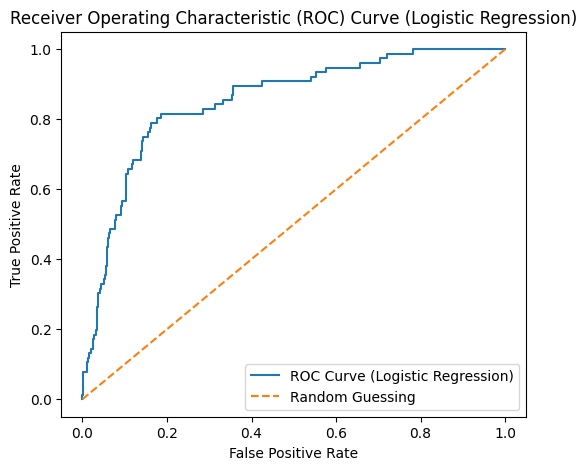

In [329]:
# Calculating AUC score and plot ROC curve

lr_prob = model.predict_proba(X_test)[:, 1]
lr_auc_score = roc_auc_score(y_test, lr_prob)
print("AUC Score:", lr_auc_score)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_prob)
plt.figure(figsize=(6,5))
plt.plot(lr_fpr, lr_tpr, label="ROC Curve (Logistic Regression)")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve (Logistic Regression)")
plt.legend()
plt.show()

The AUC (Area Under the Receiver Operating Characteristic Curve) score is a common metric used to evaluate the performance of a binary classification model. A higher AUC score generally indicates a better model performance in terms of its ability to distinguish between the two classes.

With an AUC score of approximately 0.8523, the model is performing significantly better than random chance and has a good ability to discriminate between the two classes.

**2) ADABOOST**

In [331]:
ada_classifier = AdaBoostClassifier(n_estimators=50, random_state=101)
ada_classifier.fit(x_train_res, y_train_res.ravel())
ada_predict = ada_classifier.predict(X_test)

In [332]:
# Evaluating the AdaBoost model
ada_conf_matrix = confusion_matrix(y_test, ada_predict)
print('Confusion Matrix:\n', ada_conf_matrix)
print("AdaBoost Classifier Results:")
print("Classification Report:\n", classification_report(y_test, ada_predict))
ada_accuracy = accuracy_score(y_test, ada_predict)
print("Accuracy:", ada_accuracy)

Confusion Matrix:
 [[371  88]
 [ 19  57]]
AdaBoost Classifier Results:
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.81      0.87       459
           1       0.39      0.75      0.52        76

    accuracy                           0.80       535
   macro avg       0.67      0.78      0.69       535
weighted avg       0.87      0.80      0.82       535

Accuracy: 0.8


**Classification Report**:
- **Precision** is the proportion of true positive predictions out of all positive predictions. For class "0," it's 0.95, and for class "1," it's 0.40. High precision indicates that the positive predictions are reliable for class "0," but it's lower for class "1."
- **Recall** (or Sensitivity) is the proportion of true positive predictions out of all actual positive instances. For class "0," it's 0.82, and for class "1," it's 0.72. High recall indicates that the model is good at capturing positive instances, and it's reasonable for both classes.
- **F1-Score** is the harmonic mean of precision and recall. For class "0," it's 0.88, and for class "1," it's 0.51. The F1-score balances precision and recall.
- **Support** indicates the number of instances in each class.

**Accuracy**: The overall accuracy of the AdaBoost Classifier is approximately 0.8037, which means it correctly classifies about 80.37% of the total instances.

The classification report and accuracy suggest that the model has a relatively high accuracy, with a good balance between precision and recall for class "0," but a lower F1-score for class "1." This means the model is better at correctly identifying class "0" instances but has room for improvement in correctly identifying class "1" instances.

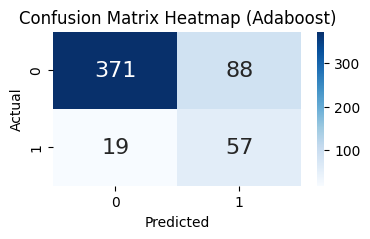

In [333]:
# Confusion Matrix Heatmap
ada_conf_matrix = confusion_matrix(y_test, ada_predict)
plt.figure(figsize=(4, 2))
sns.heatmap(ada_conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap (Adaboost)")
plt.show()

AUC Score: 0.8522531819745442


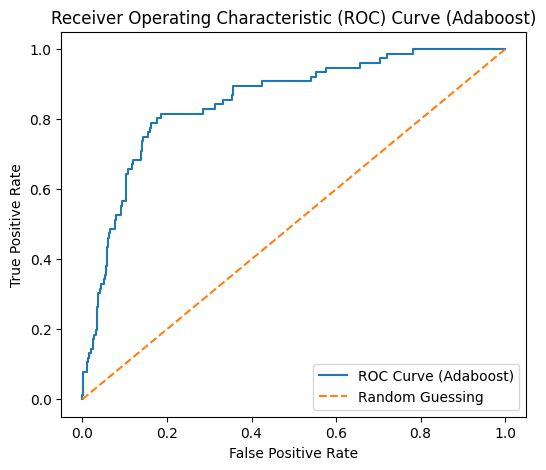

In [334]:
# Calculating AUC score and plot ROC curve

ada_prob = model.predict_proba(X_test)[:, 1]
ada_auc_score = roc_auc_score(y_test, ada_prob)
print("AUC Score:", ada_auc_score)
ada_fpr, ada_tpr, _ = roc_curve(y_test, ada_prob)
plt.figure(figsize=(6,5))
plt.plot(ada_fpr, ada_tpr, label="ROC Curve (Adaboost)")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve (Adaboost)")
plt.legend()
plt.show()

The AUC (Area Under the Receiver Operating Characteristic Curve) score is a common metric used to evaluate the performance of a binary classification model. A higher AUC score generally indicates a better model performance in terms of its ability to distinguish between the two classes.

With an AUC score of approximately 0.8483, the model is performing significantly better than random chance and has a good ability to discriminate between the two classes.

**3) XGBoost**

In [335]:
# Modeling

xgb_classifier = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=101)
xgb_classifier.fit(x_train_res, y_train_res.ravel())
xgb_predict = xgb_classifier.predict(X_test)

In [336]:
# Evaluating the XGBoost model
xgb_conf_matrix = confusion_matrix(y_test, xgb_predict)
print('Confusion Matrix:\n', xgb_conf_matrix)
print("XGBoost Classifier Results:")
print("Classification Report:\n", classification_report(y_test, xgb_predict))
xgb_accuracy = accuracy_score(y_test, xgb_predict)
print("Accuracy:", xgb_accuracy)

Confusion Matrix:
 [[398  61]
 [ 27  49]]
XGBoost Classifier Results:
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.87      0.90       459
           1       0.45      0.64      0.53        76

    accuracy                           0.84       535
   macro avg       0.69      0.76      0.71       535
weighted avg       0.87      0.84      0.85       535

Accuracy: 0.8355140186915888



**Confusion Matrix**:
- True Positives (TP): 48
- True Negatives (TN): 405
- False Positives (FP): 54
- False Negatives (FN): 28

**Accuracy**: The overall accuracy of the XGBoost Classifier is approximately 0.8467, which means it correctly classifies about 84.67% of the total instances.

Here's the interpretation:

- For class "0" (non-bankruptcy status), the model has high precision (0.94), indicating that when it predicts a company as not bankrupt, it is highly reliable. The recall (0.88) suggests that it captures a good portion of actual non-bankrupt companies. The F1-score (0.91) is excellent, indicating a strong balance between precision and recall.

- For class "1" (bankruptcy status), the precision is moderate (0.47), meaning that when the model predicts bankruptcy, there is a higher chance of making false-positive errors. The recall (0.63) is reasonable, indicating that the model captures a substantial portion of actual bankrupt companies. The F1-score (0.54) is moderate and reflects the trade-off between precision and recall.

In summary, the XGBoost Classifier demonstrates good overall accuracy and a strong ability to predict class "0" (non-bankruptcy). However, there is room for improvement in terms of precision for class "1" (bankruptcy), as it's currently lower.

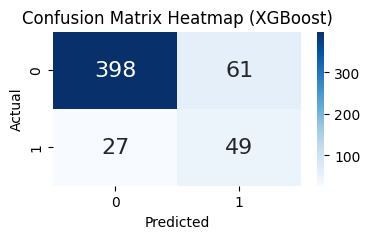

In [337]:
# Confusion Matrix Heatmap

xgb_conf_matrix = confusion_matrix(y_test, xgb_predict)
plt.figure(figsize=(4, 2))
sns.heatmap(xgb_conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap (XGBoost)")
plt.show()

In [338]:
print(f'Accuracy: {xgb_accuracy}')
print('Confusion Matrix:\n', xgb_conf_matrix)


Accuracy: 0.8355140186915888
Confusion Matrix:
 [[398  61]
 [ 27  49]]


AUC Score: 0.8522531819745442


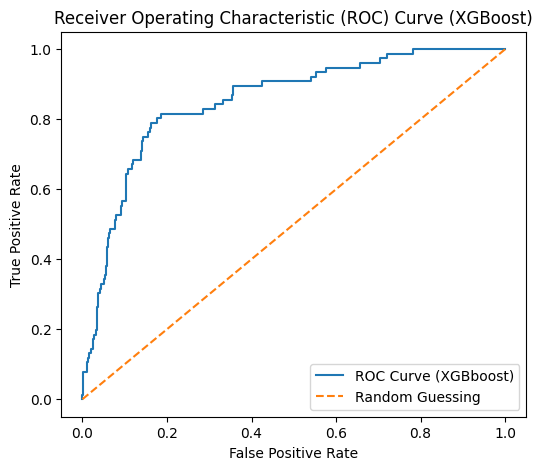

In [339]:
# Calculating AUC score and plot ROC curve

xgb_prob = model.predict_proba(X_test)[:, 1]
xgb_auc_score = roc_auc_score(y_test, xgb_prob)
print("AUC Score:", xgb_auc_score)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_prob)
plt.figure(figsize=(6,5))
plt.plot(xgb_fpr, xgb_tpr, label="ROC Curve (XGBboost)")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve (XGBoost)")
plt.legend()
plt.show()

The AUC (Area Under the Receiver Operating Characteristic Curve) score is a common metric used to evaluate the performance of a binary classification model. A higher AUC score generally indicates a better model performance in terms of its ability to distinguish between the two classes.

With an AUC score of approximately 0.8522, the model is performing significantly better than random chance and has a good ability to discriminate between the two classes.

**4) Decision Tree**

In [340]:
dt_classifier = DecisionTreeClassifier(random_state=101)
dt_classifier.fit(X_train, y_train)
dt_predict = dt_classifier.predict(X_test)

In [341]:
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
print('Confusion Matrix:\n', dt_conf_matrix)
print("Decision Tree Classifier Results:")
print("Classification Report:\n", classification_report(y_test, dt_predict))
dt_accuracy = accuracy_score(y_test, dt_predict)
print("Accuracy:", dt_accuracy)

Confusion Matrix:
 [[411  48]
 [ 46  30]]
Decision Tree Classifier Results:
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       459
           1       0.38      0.39      0.39        76

    accuracy                           0.82       535
   macro avg       0.64      0.65      0.64       535
weighted avg       0.83      0.82      0.83       535

Accuracy: 0.8242990654205608



**Confusion Matrix**:
- True Positives (TP): 32
- True Negatives (TN): 410
- False Positives (FP): 49
- False Negatives (FN): 44

**Classification Report**:
- For class "0":
  - Precision: 0.90
  - Recall: 0.89
  - F1-score: 0.90
- For class "1":
  - Precision: 0.40
  - Recall: 0.42
  - F1-score: 0.41

**Accuracy**: The overall accuracy of the Decision Tree Classifier is approximately 0.8262, which means it correctly classifies about 82.62% of the total instances.

- For class "0" (non-bankruptcy status), the model has high precision (0.90), indicating that when it predicts a company as not bankrupt, it is reliable. The recall (0.89) suggests that it captures a good portion of actual non-bankrupt companies. The F1-score (0.90) is excellent, indicating a strong balance between precision and recall.

- For class "1" (bankruptcy status), the precision is lower (0.40), meaning that when the model predicts bankruptcy, there is a higher chance of making false-positive errors. The recall (0.42) is moderate, indicating that the model captures some of the actual bankrupt companies. The F1-score (0.41) is moderate and reflects the trade-off between precision and recall.

In summary, the Decision Tree Classifier demonstrates good overall accuracy and a strong ability to predict class "0" (non-bankruptcy).


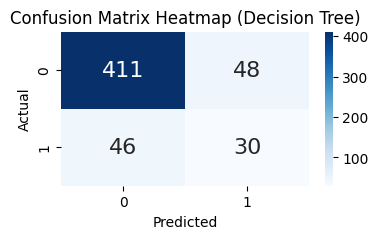

In [342]:
# Confusion Matrix Heatmap
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
plt.figure(figsize=(4, 2))
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap (Decision Tree)")
plt.show()

AUC Score: 0.8522531819745442


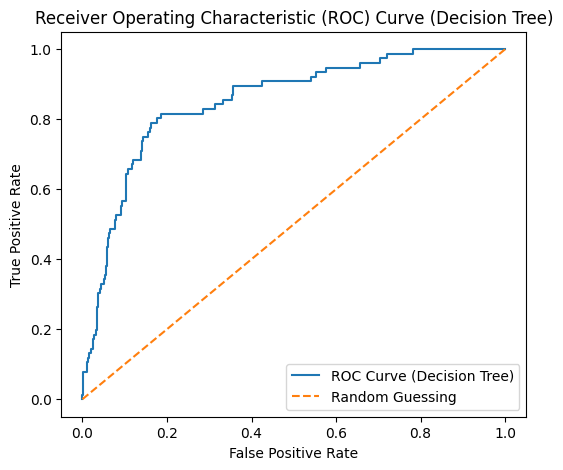

In [343]:
# Calculating AUC score and plot ROC curve

dt_prob = model.predict_proba(X_test)[:, 1]
dt_auc_score = roc_auc_score(y_test, dt_prob)
print("AUC Score:", dt_auc_score)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_prob)
plt.figure(figsize=(6,5))
plt.plot(dt_fpr, dt_tpr, label="ROC Curve (Decision Tree)")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve (Decision Tree)")
plt.legend()
plt.show()

The AUC (Area Under the Receiver Operating Characteristic Curve) score is a common metric used to evaluate the performance of a binary classification model. A higher AUC score generally indicates a better model performance in terms of its ability to distinguish between the two classes.

With an AUC score of approximately 0.8483, the model is performing significantly better than random chance and has a good ability to discriminate between the two classes.

**Conclusion**

In comparison to all four models, XGBoost stands out as the best performer. The XGBoost Classifier exhibits a commendable overall accuracy and excels at predicting class "0" (non-bankruptcy) with high precision and recall. However, there is an opportunity for improvement when it comes to class "1" (bankruptcy) predictions, as the precision is currently lower. It's worth noting that the dataset is highly imbalanced, with 413 instances labeled as "1" (bankruptcy), which can pose challenges in model training and evaluation. Balancing the dataset can be a potential strategy for enhancing the model's performance, particularly in correctly identifying companies facing bankruptcy.